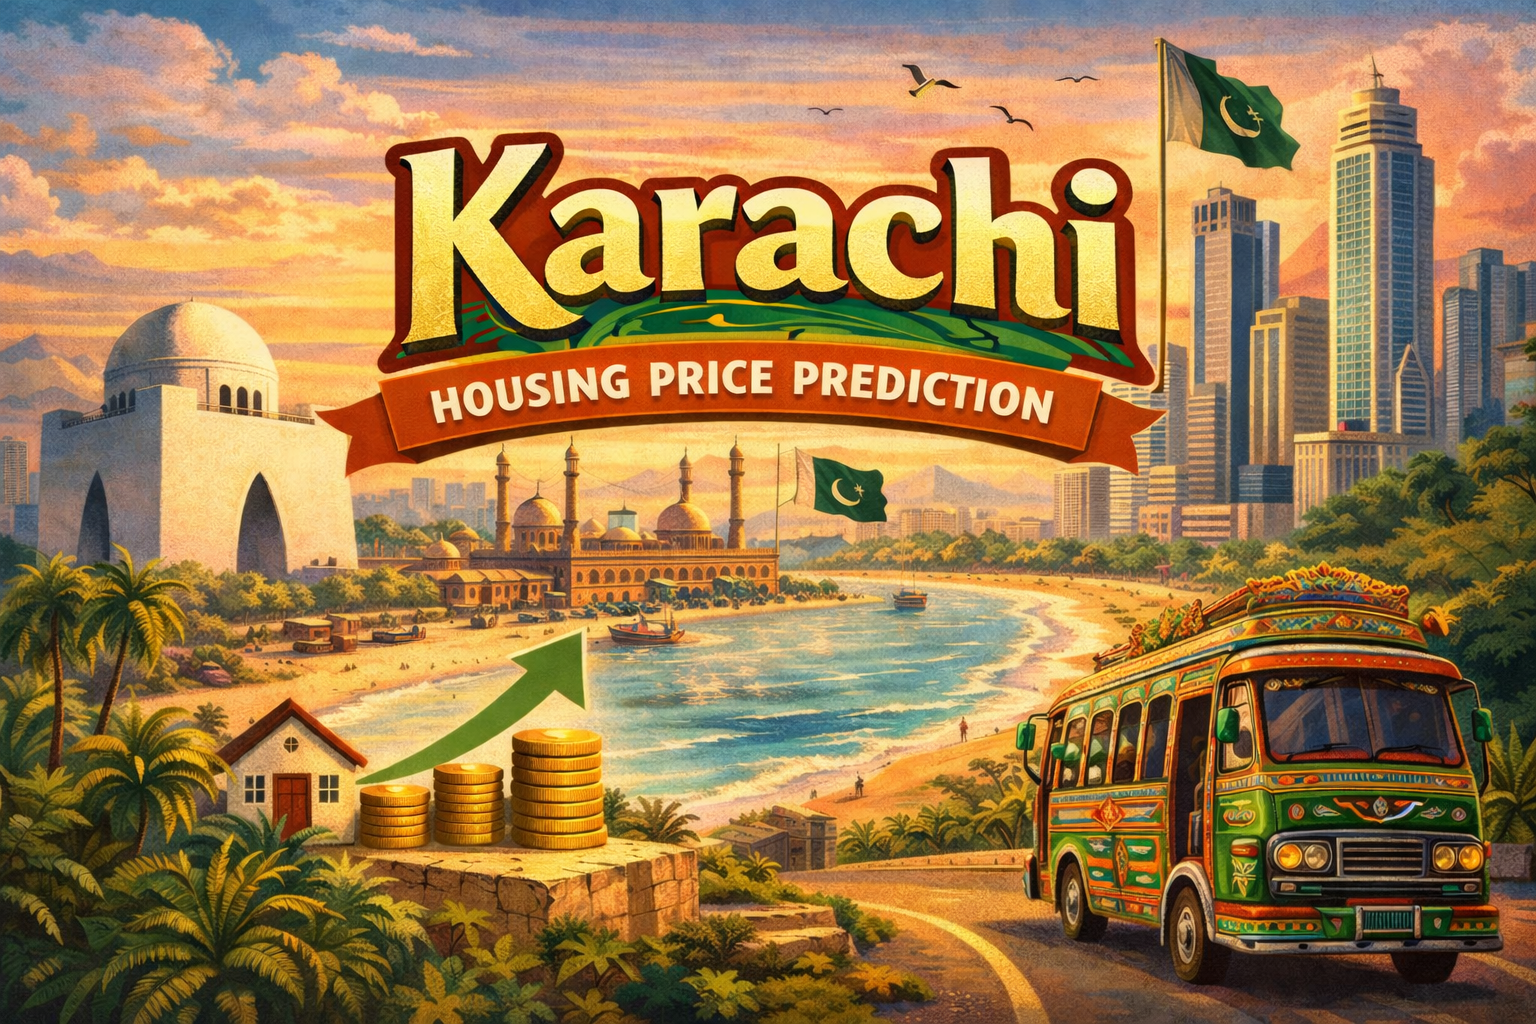

In [2]:
from IPython.display import Image, display
display(Image(filename='/kaggle/input/karachi/ChatGPT Image Feb 2 2026 04_03_10 PM.png'))

# **Importing Dependencies**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# **Importing data**

In [4]:
df = pd.read_csv('/kaggle/input/karachi-housing-prices/karachi_housing_prices.csv')

In [5]:
df.head()

,Area,Year,Price_per_sqm_Local,Size_sqm,Bedrooms,Total_Price_Local
0,North Nazimabad,2024,412594,215,4,88707710
1,North Nazimabad,2025,368707,69,2,25440783
2,Saddar,2018,81080,164,4,13297120
3,Gulshan,2024,283222,191,6,54095402
4,Clifton,2024,390208,104,1,40581632


In [6]:
df.describe()

,Year,Price_per_sqm_Local,Size_sqm,Bedrooms,Total_Price_Local
count,230.000000,230.000000,230.000000,230.000000,2.300000e+02
mean,2021.439130,252295.795652,198.800000,3.582609,5.005378e+07
std,2.357417,112889.728183,85.108941,1.710398,3.266603e+07
min,2018.000000,62743.000000,50.000000,1.000000,5.025790e+06
25%,2019.000000,155367.250000,125.000000,2.000000,2.683974e+07
50%,2021.000000,238966.000000,198.000000,3.000000,3.967638e+07
75%,2023.000000,351952.000000,272.000000,5.000000,6.597343e+07
max,2025.000000,448643.000000,349.000000,6.000000,1.469545e+08


# **Splitting data**

In [7]:
X = df.drop(['Total_Price_Local', 'Area'], axis=1)
y = df['Total_Price_Local']

In [8]:
print(X)
print(y)

     Year  Price_per_sqm_Local  Size_sqm  Bedrooms
0    2024               412594       215         4
1    2025               368707        69         2
2    2018                81080       164         4
3    2024               283222       191         6
4    2024               390208       104         1
..    ...                  ...       ...       ...
225  2019               289268       225         1
226  2024               155644       334         6
227  2023               316557       125         6
228  2019               198510       114         2
229  2019               160399       314         6

[230 rows x 4 columns]
0      88707710
1      25440783
2      13297120
3      54095402
4      40581632
         ...   
225    65085300
226    51985096
227    39569625
228    22630140
229    50365286
Name: Total_Price_Local, Length: 230, dtype: int64


In [9]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [10]:
print(X.shape, X_train.shape, X_test.shape)

(230, 4) (184, 4) (46, 4)


# **Model Training**

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression()

# **Evaluation**

In [13]:
training_data_pred = model.predict(X_train)

In [14]:
print(training_data_pred)

[ 4.30871923e+07  6.92759131e+06  3.81910175e+07  5.30042687e+07
  3.25693005e+07  4.10913261e+07  4.68644234e+07  9.17849819e+06
  6.29811730e+07  6.41169504e+07  5.34900119e+06  3.31792695e+07
  6.20509704e+07  1.06004161e+08  1.49215730e+06  4.40813053e+07
  6.15077188e+07  3.60477688e+07  8.92476231e+07  4.12053948e+07
  1.03651809e+08  9.63128321e+07  4.18866498e+07  1.10170872e+08
  1.08979863e+08  5.27975720e+07  6.36396754e+07  5.15485768e+07
  4.63314120e+07  7.50751411e+07  8.43633788e+07  3.19619350e+07
  2.95825599e+07  3.64907814e+07  9.60811849e+07  3.28817850e+07
  4.30719538e+07  5.15300927e+07  1.07874823e+08 -1.78480517e+05
  3.45482108e+07  7.35198069e+07  2.64250355e+06  2.46875489e+07
  1.15130659e+08  3.29419924e+07  6.65971058e+07  8.25755281e+07
  1.90521081e+06  7.71269414e+07  8.39500578e+07  2.69210999e+07
  4.25239352e+07  4.20333694e+07  4.13568751e+07  2.66380027e+07
  5.27102505e+07  9.91824809e+07  6.01620583e+07  7.20298015e+07
  6.45749873e+07  4.80105

In [15]:
#R squared error
score_1 = metrics.r2_score(y_train, training_data_pred)

print("R squared error: ", score_1)


R squared error:  0.9171619625181919


# **Visualizing actual prices and predicted prices (Training)**

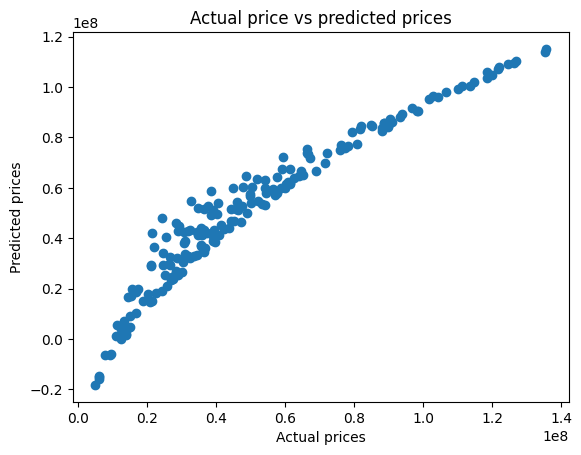

In [16]:
plt.scatter(y_train, training_data_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual price vs predicted prices')
plt.show()

# **Prediction on test data**

In [17]:
test_data_pred = model.predict(X_test)

In [18]:
#R squared error
score_1 = metrics.r2_score(y_test, test_data_pred)

print("R squared error: ", score_1)

R squared error:  0.8910854144194196


# **Visualizing actual prices and predicted prices (Testing)**

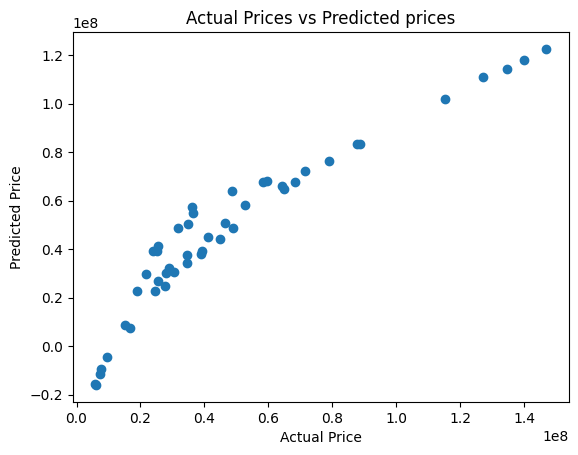

In [19]:
plt.scatter(y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted prices")
plt.show()